In [1]:
import random
import math

In [2]:
def eucldist(p0,p1):
    dist = 0.0
    for i in range(0,len(p0)):
        dist += (p0[i] - p1[i])**2
    return math.sqrt(dist)

In [3]:
#K-Means Algorithm
def kmeans(k,datapoints):

    # d - Dimensionality of Datapoints
    d = len(datapoints[0]) 
    
    #Limit our iterations
    Max_Iterations = 1000
    i = 0
    
    cluster = [0] * len(datapoints)
    prev_cluster = [-1] * len(datapoints)
    
    #Randomly Choose Centers for the Clusters
    cluster_centers = []
    for i in range(0,k):
        new_cluster = []
        #for i in range(0,d):
        #    new_cluster += [random.randint(0,10)]
        cluster_centers += [random.choice(datapoints)]
        
        
        #Sometimes The Random points are chosen poorly and so there ends up being empty clusters
        #In this particular implementation we want to force K exact clusters.
        #To take this feature off, simply take away "force_recalculation" from the while conditional.
        force_recalculation = False
    
    while (cluster != prev_cluster) or (i > Max_Iterations) or (force_recalculation) :
        
        prev_cluster = list(cluster)
        force_recalculation = False
        i += 1
    
        #Update Point's Cluster Alligiance
        for p in range(0,len(datapoints)):
            min_dist = float("inf")
            
            #Check min_distance against all centers
            for c in range(0,len(cluster_centers)):
                
                dist = eucldist(datapoints[p],cluster_centers[c])
                
                if (dist < min_dist):
                    min_dist = dist  
                    cluster[p] = c   # Reassign Point to new Cluster
        
        
        #Update Cluster's Position
        for k in range(0,len(cluster_centers)):
            new_center = [0] * d
            members = 0
            for p in range(0,len(datapoints)):
                if (cluster[p] == k): #If this point belongs to the cluster
                    for j in range(0,d):
                        new_center[j] += datapoints[p][j]
                    members += 1
            
            for j in range(0,d):
                if members != 0:
                    new_center[j] = new_center[j] / float(members) 
                
                #This means that our initial random assignment was poorly chosen
                #Change it to a new datapoint to actually force k clusters
                else: 
                    new_center = random.choice(datapoints)
                    force_recalculation = True
                    print ("Forced Recalculation...")
                    
            
            cluster_centers[k] = new_center
    
        
    print ("======== Results ========")
    print ("Clusters", cluster_centers)
    print ("Iterations",i)
    print ("Assignments", cluster)


In [4]:
if __name__ == "__main__":
    #2D - Datapoints List of n d-dimensional vectors. (For this example I already set up 2D Tuples)
    #Feel free to change to whatever size tuples you want...
    datapoints = [(5.9, 3.2), (4.6, 2.9), (6.2, 2.8), (4.7, 3.2), (5.5, 4.2), (5, 3), (4.9, 3.1), (6.7, 3.1), (5.1, 3.5), (6, 3)]

    k = 3 # K - Number of Clusters
      
    kmeans(k,datapoints) 

======== Results ========
Clusters [[5.95, 3.1], [4.966666666666668, 3.316666666666667], [6.45, 2.95]]
Iterations 5
Assignments [0, 1, 2, 1, 1, 1, 1, 2, 1, 0]


In [5]:
import numpy as np

In [6]:
def compute_euclidean_distance(point, centroid):
    return np.sqrt(np.sum((point - centroid)**2))

In [7]:
def assign_label_cluster(distance, data_point, centroids):
    index_of_minimum = min(distance, key=distance.get)
    return [index_of_minimum, data_point, centroids[index_of_minimum]]

In [8]:
def compute_new_centroids(cluster_label, centroids):
    return np.array(cluster_label + centroids)/2

In [9]:
def iterate_k_means(data_points, centroids, total_iteration):
    label = []
    cluster_label = []
    total_points = len(data_points)
    k = len(centroids)
    
    for iteration in range(0, total_iteration):
        for index_point in range(0, total_points):
            distance = {}
            for index_centroid in range(0, k):
                distance[index_centroid] = compute_euclidean_distance(data_points[index_point], centroids[index_centroid])
            label = assign_label_cluster(distance, data_points[index_point], centroids)
            centroids[label[0]] = compute_new_centroids(label[1], centroids[label[0]])

            if iteration == (total_iteration - 1):
                cluster_label.append(label)

    return [cluster_label, centroids]

In [10]:
def print_label_data(result):
    print("Result of k-Means Clustering: \n")
    for data in result[0]:
        print("data point: {}".format(data[1]))
        print("cluster number: {} \n".format(data[0]))
    print("Last centroids position: \n {}".format(result[1]))

In [11]:
def create_centroids():
    centroids = []
    centroids.append([6.2, 3.2])
    centroids.append([6.6, 3.7])
    centroids.append([6.5, 3.0])
    return np.array(centroids)

In [12]:
if __name__ == "__main__":
    filename = "data.csv"
    data_points = np.genfromtxt(filename, delimiter=",")
    centroids = create_centroids()
    total_iteration = 1
    
    [cluster_label, new_centroids] = iterate_k_means(data_points, centroids, total_iteration)
    print_label_data([cluster_label, new_centroids])
    print()

Result of k-Means Clustering: 

data point: [5.9 6.2]
cluster number: 1 

data point: [4.6 2.9]
cluster number: 0 

data point: [6.2 2.8]
cluster number: 2 

data point: [4.7 3.2]
cluster number: 0 

data point: [5. 3.]
cluster number: 0 

data point: [5.5 4.2]
cluster number: 1 

data point: [4.9 3. ]
cluster number: 0 

data point: [6.7 3.1]
cluster number: 2 

data point: [5.1 3.1]
cluster number: 0 

data point: [6. 3.]
cluster number: 2 

Last centroids position: 
 [[5.03125  3.065625]
 [5.875    4.575   ]
 [6.2625   3.      ]]



In [13]:
import matplotlib.pyplot as plt

In [14]:
data_points

array([[5.9, 6.2],
       [4.6, 2.9],
       [6.2, 2.8],
       [4.7, 3.2],
       [5. , 3. ],
       [5.5, 4.2],
       [4.9, 3. ],
       [6.7, 3.1],
       [5.1, 3.1],
       [6. , 3. ]])

In [15]:
data_points, centroids

(array([[5.9, 6.2],
        [4.6, 2.9],
        [6.2, 2.8],
        [4.7, 3.2],
        [5. , 3. ],
        [5.5, 4.2],
        [4.9, 3. ],
        [6.7, 3.1],
        [5.1, 3.1],
        [6. , 3. ]]),
 array([[5.03125 , 3.065625],
        [5.875   , 4.575   ],
        [6.2625  , 3.      ]]))

In [16]:
cluster_label

[[1, array([5.9, 6.2]), array([5.875, 4.575])],
 [0, array([4.6, 2.9]), array([5.03125 , 3.065625])],
 [2, array([6.2, 2.8]), array([6.2625, 3.    ])],
 [0, array([4.7, 3.2]), array([5.03125 , 3.065625])],
 [0, array([5., 3.]), array([5.03125 , 3.065625])],
 [1, array([5.5, 4.2]), array([5.875, 4.575])],
 [0, array([4.9, 3. ]), array([5.03125 , 3.065625])],
 [2, array([6.7, 3.1]), array([6.2625, 3.    ])],
 [0, array([5.1, 3.1]), array([5.03125 , 3.065625])],
 [2, array([6., 3.]), array([6.2625, 3.    ])]]

In [17]:
c1x=[]
c2x=[]
c3x=[]
c1y=[]
c2y=[]
c3y=[]
for data in cluster_label:
    if data[0] == 0:
        c1x.append(data[1][0])
        c1y.append(data[1][1])
    if data[0] == 1:
        c2x.append(data[1][0])
        c2y.append(data[1][1])
    if data[0] == 2:
        c3x.append(data[1][0])
        c3y.append(data[1][1])
        


In [18]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

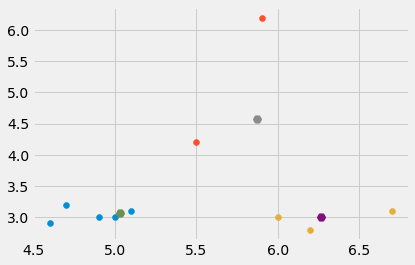

In [19]:
plt.style.use("fivethirtyeight")

plt.scatter(c1x, c1y)
plt.scatter(c2x, c2y)
plt.scatter(c3x, c3y)

plt.scatter(centroids[0][0], centroids[0][1], linewidth=3, marker='H')
plt.scatter(centroids[1][0], centroids[1][1], linewidth=3, marker='H')
plt.scatter(centroids[2][0], centroids[2][1], linewidth=3, marker='H')